In [5]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [7]:
melhousing = Path("melb_data1.csv")

In [8]:
melhousing_df=pd.read_csv(melhousing)
melhousing_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,3067,...,1,1.0,202,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,...,1,0.0,156,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,...,2,0.0,134,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,3067,...,2,1.0,94,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,...,1,2.0,120,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [10]:
melhousing_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
BuildingArea      7130
YearBuilt         8205
CouncilArea      12211
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [11]:
#Drop columns BuildingArea and YearBuilt
melhousingclean_df=melhousing_df.drop(["BuildingArea","YearBuilt"],axis=1)
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      12211
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [12]:
# Forward fill missing values in column CouncilArea
melhousingclean_df["CouncilArea"]= melhousingclean_df["CouncilArea"].ffill
melhousingclean_df.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13518
Landsize         13580
CouncilArea      13580
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

In [13]:
# Chi-Square Test between 'Type' (Property Type) and 'Method' (Sales Method)

# Create a contingency table
contingency_table = pd.crosstab(melhousingclean_df['Type'], melhousingclean_df['Method'])

# Display the contingency table to see how the data is distributed
print(contingency_table)

Method    PI     S  SA    SP   VB
Type                             
h       1069  6507  66  1079  728
t        134   723   7   143  107
u        361  1792  19   481  364


In [14]:
# dof = (Number of Rows - 1) x (Number of Columns - 1)

# Calculate degrees of freedom
dof = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
dof

8

In [15]:
# Perform the Chi-Square test using scipy.stats
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the chi-square statistic, p-value, and degrees of freedom
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")

# Print the expected frequencies
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 120.08519425521132
P-Value: 3.183702485154384e-22
Degrees of Freedom: 8
Expected Frequencies Table:
[[1088.2353461  6277.53151694   64.01384389 1184.95191458  834.2673785 ]
 [ 128.29867452  740.09631811    7.54698085  139.7011782    98.35684831]
 [ 347.46597938 2004.37216495   20.43917526  378.34690722  266.3757732 ]]


In [16]:
# Interpretation based on p-value
if p_val < 0.05:
    print("There is a significant association between Property Type and Sales Method (Reject H0)")
else:
    print("No significant association between Property Type and Sales Method (Fail to Reject H0)")

There is a significant association between Property Type and Sales Method (Reject H0)


In [17]:
# Determine the Critical Value
alpha = 0.05  # Significance level
critical_value = stats.chi2.ppf(1 - alpha, dof)

# Print the Chi-Square Statistic, Critical Value, and P-Value
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"Critical Value: {critical_value}")
print(f"P-Value: {p_val}")

# Interpretation using Critical Value
if chi2_stat > critical_value:
    print("Chi-Square Statistic is greater than Critical Value: Reject the Null Hypothesis")
else:
    print("Chi-Square Statistic is less than or equal to Critical Value: Fail to Reject the Null Hypothesis")

Chi-Square Statistic: 120.08519425521132
Critical Value: 15.507313055865453
P-Value: 3.183702485154384e-22
Chi-Square Statistic is greater than Critical Value: Reject the Null Hypothesis


In [18]:
# Combine Latitude and Longitude
melhousingclean_df['Combined_Lat_Long'] = melhousingclean_df['Lattitude'] + melhousingclean_df['Longtitude']
melhousingclean_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Combined_Lat_Long
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,3067,2,1,1.0,202,<bound method NDFrame.ffill of 0 Yarra\...,-37.7996,144.9984,Northern Metropolitan,4019,107.1988
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067,2,1,0.0,156,<bound method NDFrame.ffill of 0 Yarra\...,-37.8079,144.9934,Northern Metropolitan,4019,107.1855
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067,3,2,0.0,134,<bound method NDFrame.ffill of 0 Yarra\...,-37.8093,144.9944,Northern Metropolitan,4019,107.1851
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,3067,3,2,1.0,94,<bound method NDFrame.ffill of 0 Yarra\...,-37.7969,144.9969,Northern Metropolitan,4019,107.2000
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067,3,1,2.0,120,<bound method NDFrame.ffill of 0 Yarra\...,-37.8072,144.9941,Northern Metropolitan,4019,107.1869


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/s

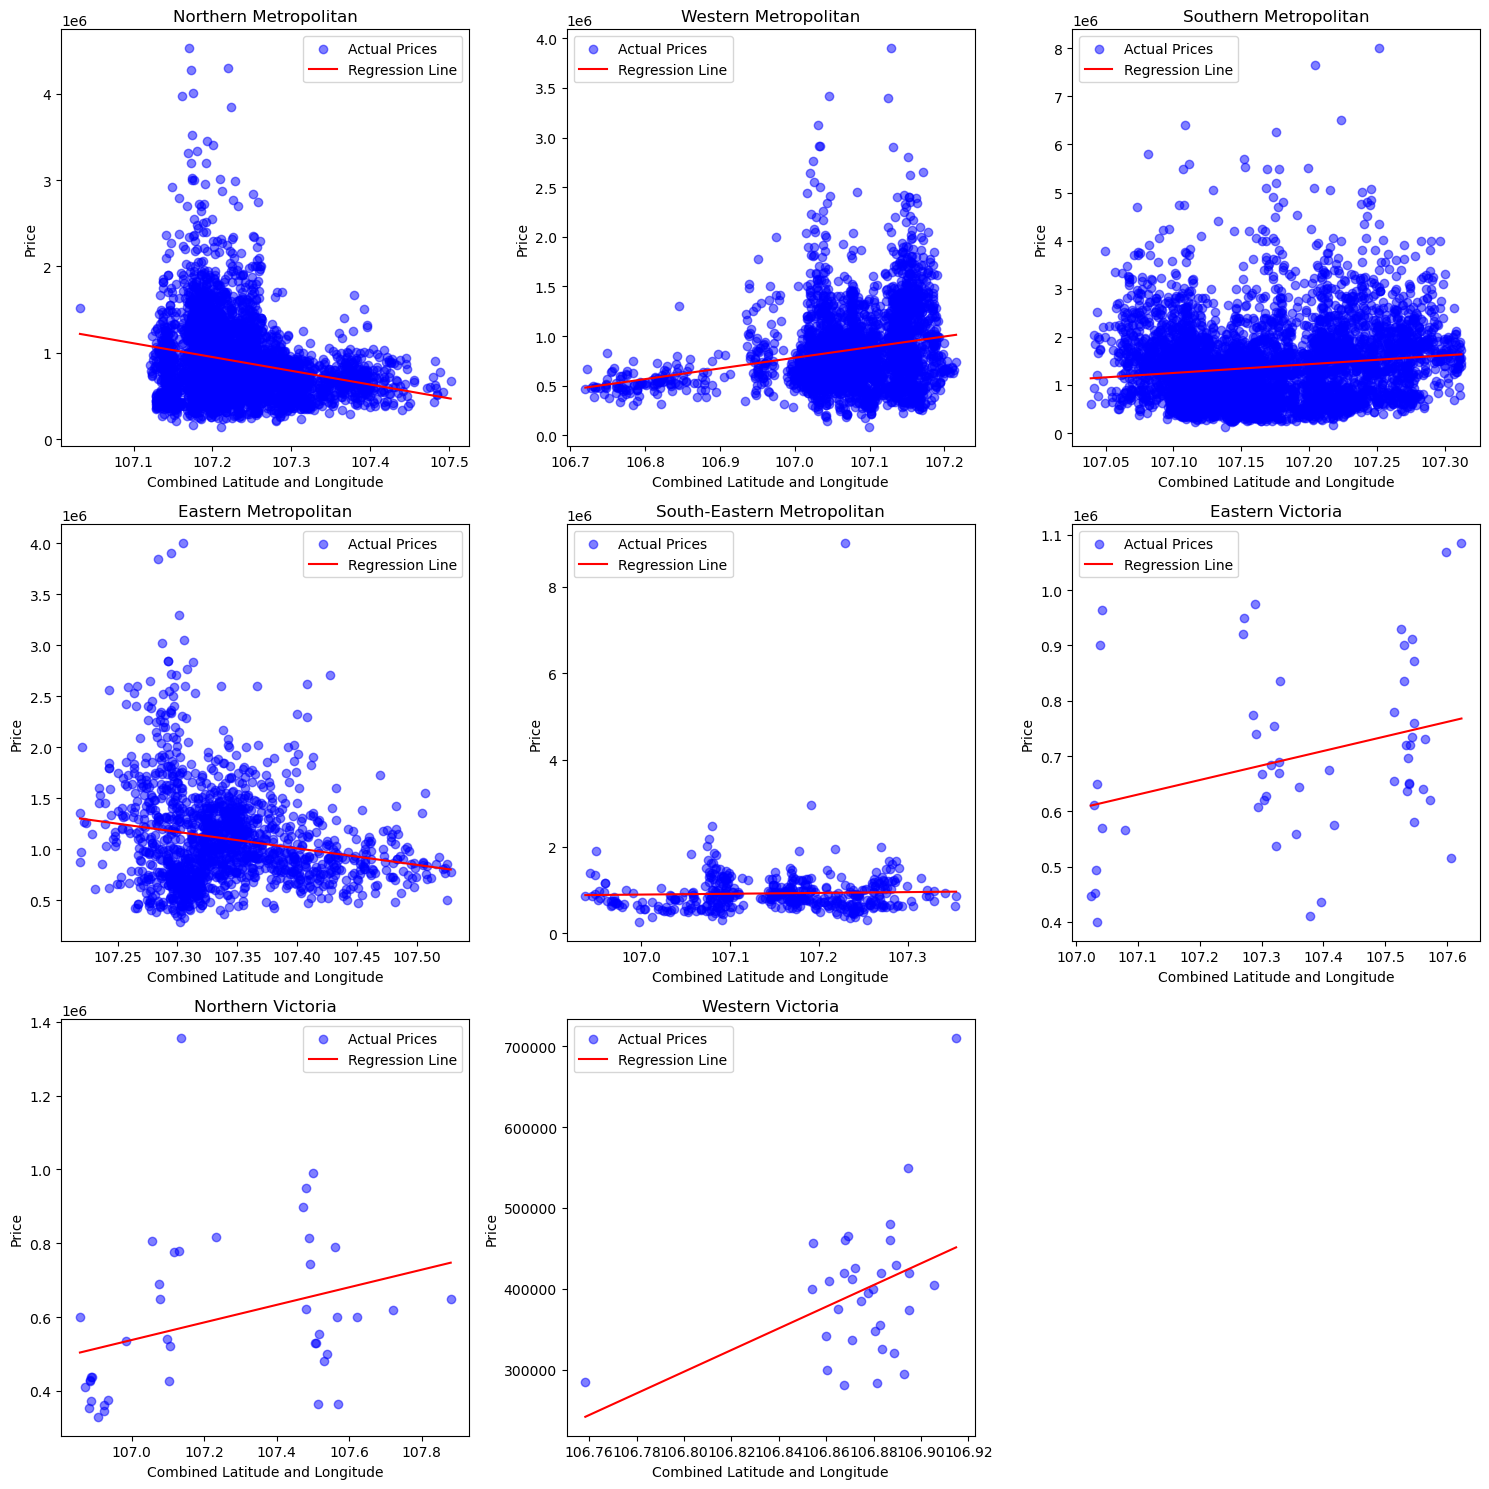

In [20]:

# Group Data by Regions and Prepare Scatter Plots
regions = melhousingclean_df['Regionname'].unique()

# Determine the number of subplots needed
num_regions = len(regions)
cols = 3
rows = (num_regions // cols) + (num_regions % cols > 0)

# Initialize the plot
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()

for i, region in enumerate(regions): 
    # Filter data for the region
    region_data = melhousingclean_df[melhousingclean_df['Regionname'] == region]
    
    # Prepare the combined data
    x_combined = region_data[['Combined_Lat_Long']]
    y = region_data['Price']
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(x_combined, y)
    
    # Generate predicted prices for the regression line
    x_range = np.linspace(x_combined.min(), x_combined.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    
    # Plot scatter and regression line
    axes[i].scatter(region_data['Combined_Lat_Long'], y, color='blue', alpha=0.5, label='Actual Prices')
    axes[i].plot(x_range, y_pred, color='red', label='Regression Line')
    axes[i].set_title(region)
    axes[i].set_xlabel('Combined Latitude and Longitude')
    axes[i].set_ylabel('Price')
    axes[i].legend()
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

/var/folders/mp/1z_l_ynx62v1q3r451k01tq00000gn/T/ipykernel_52786/1091116351.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(regions))
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:493: U

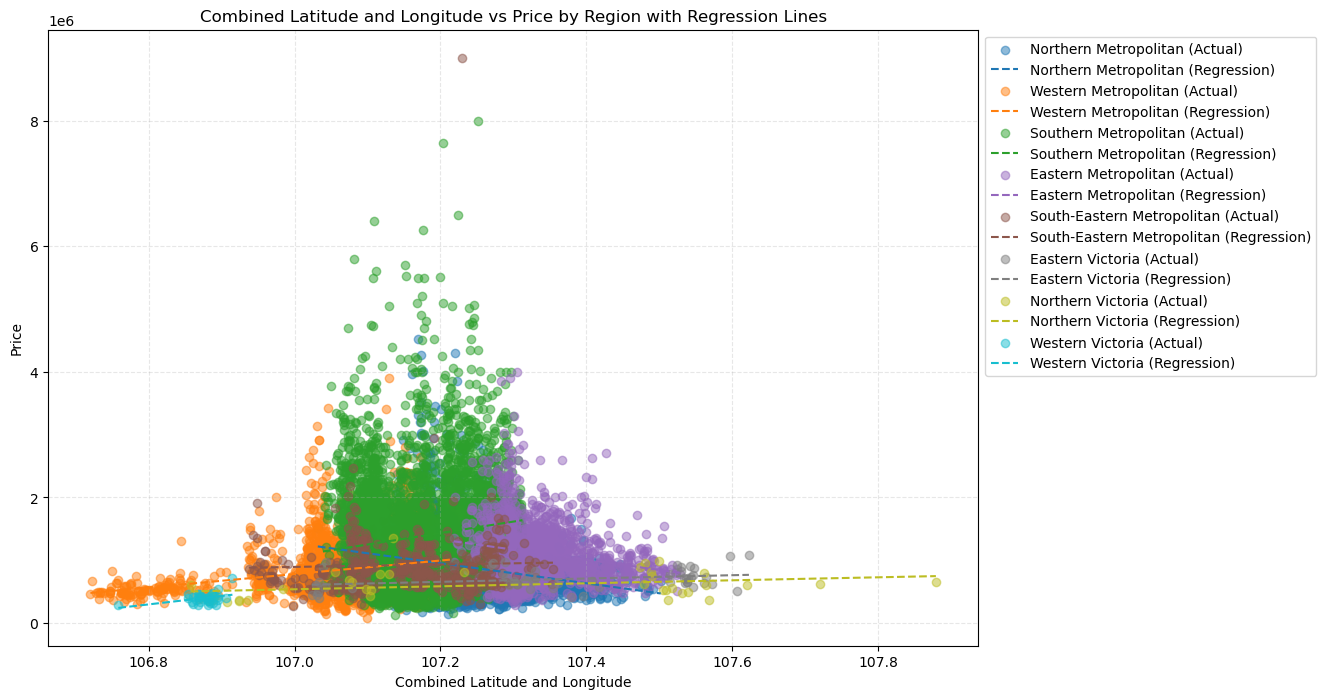

In [21]:
# Unique regions for color-coding
regions = melhousingclean_df['Regionname'].unique()
colors = plt.cm.get_cmap('tab10', len(regions))

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each region, fit regression, and plot
for i, region in enumerate(regions):
    # Filter data for the region
    region_data = melhousingclean_df[melhousingclean_df['Regionname'] == region]
    
    # Prepare the combined data
    X_combined = region_data[['Combined_Lat_Long']]
    y = region_data['Price']
    
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_combined, y)
    
    # Generate predicted prices for the regression line
    X_range = np.linspace(X_combined.min(), X_combined.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_range)
    
    # Scatter plot for the region
    plt.scatter(X_combined, y, color=colors(i), alpha=0.5, label=f'{region} (Actual)')
    
    # Regression line for the region
    plt.plot(X_range, y_pred, color=colors(i), linestyle='--', label=f'{region} (Regression)')

# Set labels and title
plt.xlabel('Combined Latitude and Longitude')
plt.ylabel('Price')
plt.title('Combined Latitude and Longitude vs Price by Region with Regression Lines')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.3)

# Show the plot
plt.show()

In [22]:
# Set the 'Date' column in datetime format
melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'])

# Extract Month and Quarter from the Date
melhousingclean_df['Month'] = melhousingclean_df['Date'].dt.month
melhousingclean_df['Quarter'] = melhousingclean_df['Date'].dt.quarter

/var/folders/mp/1z_l_ynx62v1q3r451k01tq00000gn/T/ipykernel_52786/2419151877.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'])


In [23]:
# Calculate Average Prices by Month and Quarter
average_price_by_month = melhousingclean_df.groupby('Month')['Price'].mean().reset_index()
average_price_by_quarter = melhousingclean_df.groupby('Quarter')['Price'].mean().reset_index()

# Display the average prices
print("Average Price by Month:")
print(average_price_by_month)

print("\nAverage Price by Quarter:")
print(average_price_by_quarter)

Average Price by Month:
    Month         Price
0       1  9.397921e+05
1       2  1.169051e+06
2       3  1.146762e+06
3       4  1.050479e+06
4       5  1.097807e+06
5       6  1.068981e+06
6       7  9.314698e+05
7       8  1.056371e+06
8       9  1.126349e+06
9      10  1.135970e+06
10     11  1.142503e+06
11     12  1.144737e+06

Average Price by Quarter:
   Quarter         Price
0        1  1.121940e+06
1        2  1.074564e+06
2        3  1.026398e+06
3        4  1.140803e+06


/var/folders/mp/1z_l_ynx62v1q3r451k01tq00000gn/T/ipykernel_52786/205418168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price_by_month, x='Month', y='Price', palette='Blues')


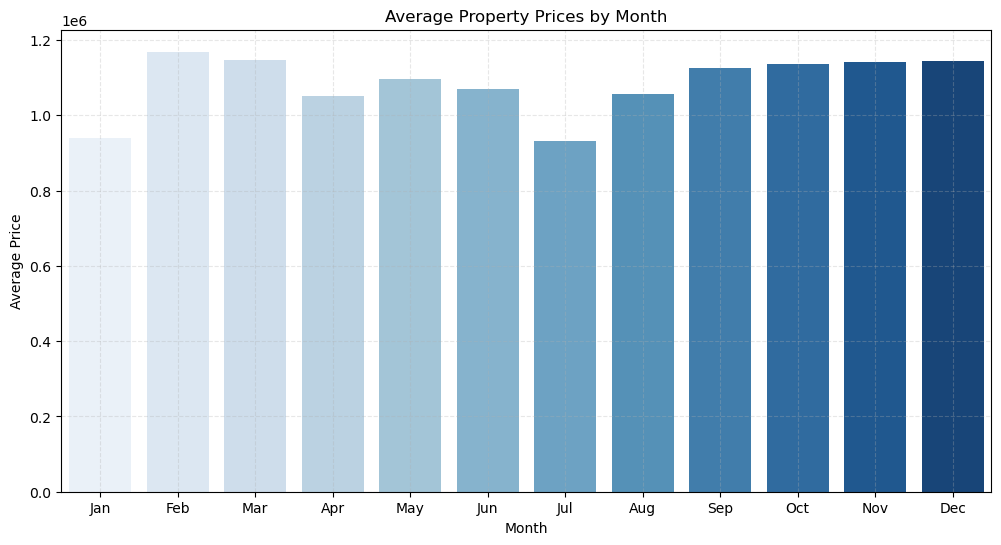

/var/folders/mp/1z_l_ynx62v1q3r451k01tq00000gn/T/ipykernel_52786/205418168.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_price_by_quarter, x='Quarter', y='Price', palette='Greens')


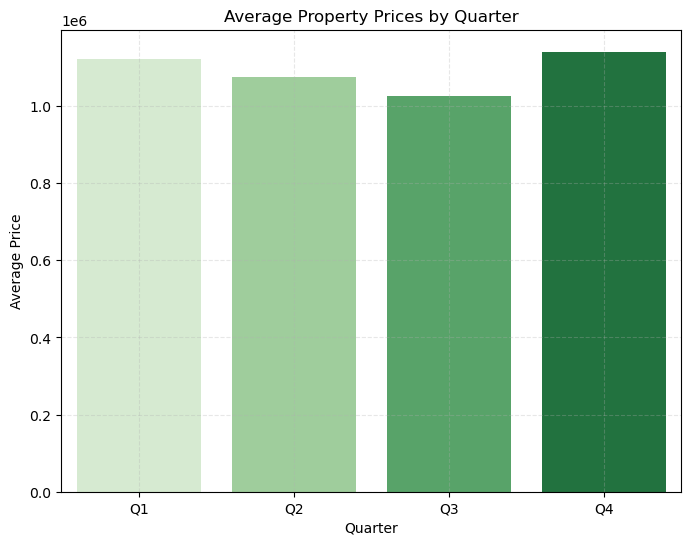

In [24]:
# Average Prices by Month
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_by_month, x='Month', y='Price', palette='Blues')
plt.title('Average Property Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Average Prices by Quarter
plt.figure(figsize=(8, 6))
sns.barplot(data=average_price_by_quarter, x='Quarter', y='Price', palette='Greens')
plt.title('Average Property Prices by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Price')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks([0, 1, 2, 3], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()

In [25]:
# Convert Date to datetime
melhousingclean_df['Date'] = pd.to_datetime(melhousingclean_df['Date'])

# Extract year and month for trend analysis
melhousingclean_df['YearMonth'] = melhousingclean_df['Date'].dt.to_period('M')

# Group by Region and Year-Month to see how property counts are changing
property_count_over_time = melhousingclean_df.groupby(['Regionname', 'YearMonth']).size().reset_index(name='Property_Count')

# Identify regions with increasing property counts (suggestive of development booms)
# Calculate the change over the last few months or years to identify growth
property_growth = property_count_over_time.groupby('Regionname')['Property_Count'].pct_change().fillna(0)

# Add the growth data to the original DataFrame
property_count_over_time['Growth'] = property_growth

# Display the property count over time with growth data
print(property_count_over_time.head())

             Regionname YearMonth  Property_Count    Growth
0  Eastern Metropolitan   2016-03              38  0.000000
1  Eastern Metropolitan   2016-04              49  0.289474
2  Eastern Metropolitan   2016-05              55  0.122449
3  Eastern Metropolitan   2016-06              50 -0.090909
4  Eastern Metropolitan   2016-07              63  0.260000


In [26]:
# Group data by Region to get overall statistics
regional_data = melhousingclean_df.groupby('Regionname').agg(
    Avg_Price=('Price', 'mean'),
    Avg_Landsize=('Landsize', 'mean'),
    Total_Properties=('Price', 'count')
).reset_index()

# Merge with property growth data to identify regions with development booms
growth_and_regional_data = pd.merge(
    property_count_over_time.groupby('Regionname').tail(1),  # Get the most recent growth data
    regional_data,
    on='Regionname'
)

# Sort by the highest growth to find booming regions
booming_regions = growth_and_regional_data.sort_values(by='Growth', ascending=False)

# Display the booming regions
print("Regions Experiencing Development Booms:")
print(booming_regions.head())

Regions Experiencing Development Booms:
                   Regionname YearMonth  Property_Count     Growth  \
4  South-Eastern Metropolitan   2017-12              28  13.000000   
0        Eastern Metropolitan   2017-12              71   6.100000   
5       Southern Metropolitan   2017-12             124   2.875000   
2       Northern Metropolitan   2017-12              79   0.975000   
6        Western Metropolitan   2017-12              73   0.921053   

      Avg_Price  Avg_Landsize  Total_Properties  
4  9.229438e+05    613.991111               450  
0  1.104080e+06    634.133923              1471  
5  1.372963e+06    509.252183              4695  
2  8.981711e+05    568.948072              3890  
6  8.664205e+05    493.606852              2948  


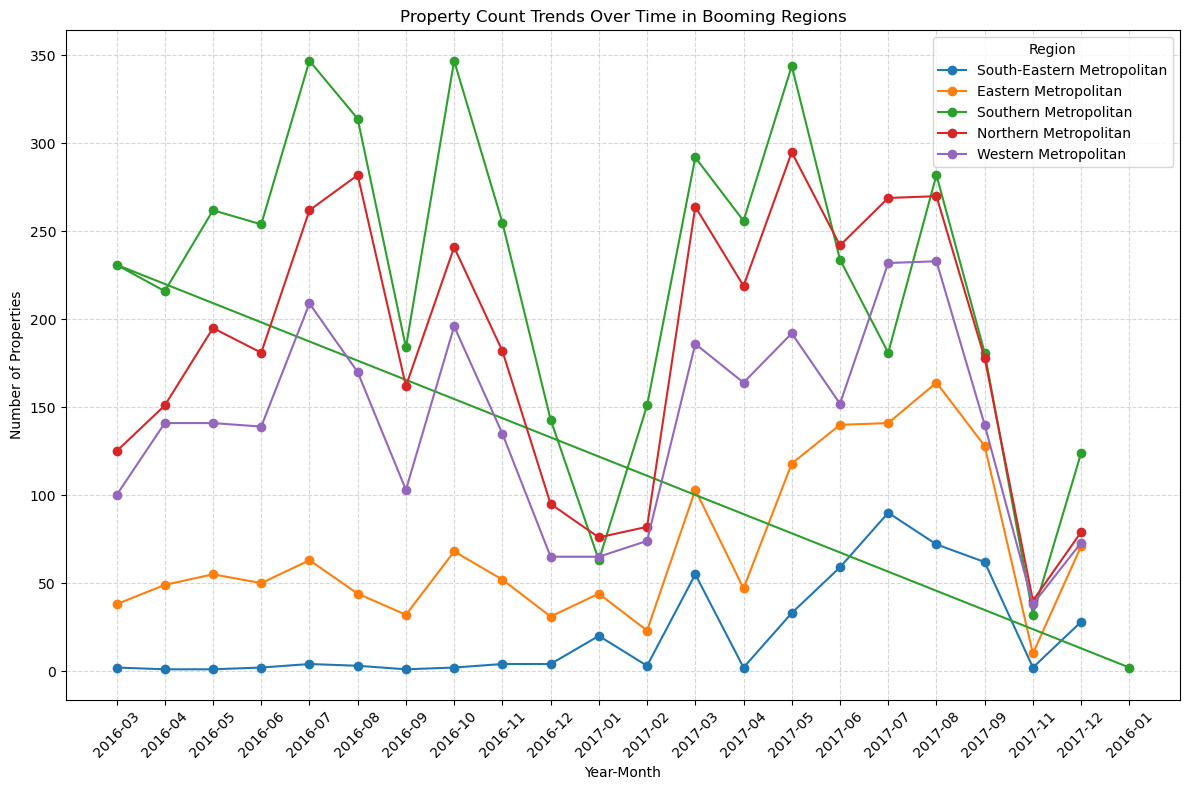

In [27]:
# Line plot to show property count trends for a few regions
top_regions = booming_regions['Regionname'].head(5)

plt.figure(figsize=(12, 8))

for region in top_regions:
    region_data = property_count_over_time[property_count_over_time['Regionname'] == region]
    plt.plot(region_data['YearMonth'].astype(str), region_data['Property_Count'], marker='o', label=region)

plt.title('Property Count Trends Over Time in Booming Regions')
plt.xlabel('Year-Month')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()